# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Lists to hold data frame variables
temp_max = []
humidity = []
clouds = []
latitude = []
longitude = []
wind_speed = []
city_name = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=650)
lngs = np.random.uniform(low=-180.000, high=180.000, size=650)
lat_lngs = zip(lats, lngs)
#print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to our cities list   
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        #print(query_url)
        
# Loop through the list of cities and perform a request for data on each
        response = requests.get(f'{query_url}').json()
        #print(response)

# Skip Keyerrors so that program will run even if there is no city or other 
        try:
            wind_speed.append(response['wind']['speed'])
            wind_speed
        
            latitude.append(response['coord']['lat'])
            latitude

            longitude.append(response['coord']['lon'])
            longitude

            city_name.append(response['name'])
            city

            country.append(response['sys']['country'])
            country

            temp_max.append(response['main']['temp_max'])
            temp_max

            humidity.append(response['main']['humidity'])
            humidity

            clouds.append(response['clouds']['all'])
            clouds

            time.sleep(1.01)


        except KeyError:
            print("This location is not a city.")
               
# Print the city count to confirm sufficient count
len(cities)       


This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.
This location is not a city.


344

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
### Convert Raw Data to DataFrame
weather_data = {'Max Temperature': temp_max, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'City Name': city_name, 'Country': country, 'Latitude': latitude, 'Longitude': longitude}
weather_data_df = pd.DataFrame(weather_data)

# Export the city data into a .csv.
#weather_data_df = pd.read_csv(weather_data, encoding="ISO-8859-1")
#weather_data_df.to_csv("Output/.weather_df.csv", index=False, header=True)
weather_data_df.to_csv("weather_df.csv")

#Display the DataFrame
weather_data_df.tail()

,Max Temperature,Humidity,Cloudiness,Wind Speed,City Name,Country,Latitude,Longitude
307,75.27,85,82,3.80,Mbuji-Mayi,CD,-6.13,23.60
308,-6.02,96,41,3.42,Srednekolymsk,RU,67.46,153.71
309,52.23,75,18,3.13,Mar del Plata,AR,-46.43,-67.52
310,74.39,26,2,13.02,Birao,CF,10.30,22.78
311,47.75,84,100,5.08,Polican,AL,40.61,20.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

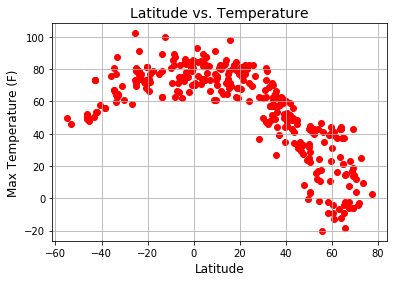

In [33]:
# Scatterplot 1
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "r", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("Latitude vs. Temperature", fontsize=14)
plt.grid(True)

#save figure to .png
plt.savefig("Latitude_vs_Temperature.png")

#Show result
plt.show()


#### Latitude vs. Humidity Plot

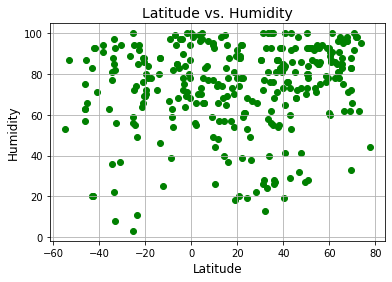

In [34]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], color = "g", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.title("Latitude vs. Humidity", fontsize=14)
plt.grid(True)
plt.savefig("lat_vs_hum.png")
plt.show()


#### Latitude vs. Cloudiness Plot

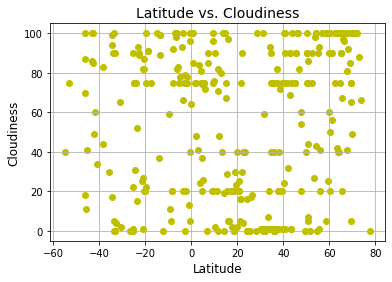

In [35]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], color = "y", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.grid(True)
plt.savefig("lat_vs_cloud.png")
plt.show()


#### Latitude vs. Wind Speed Plot

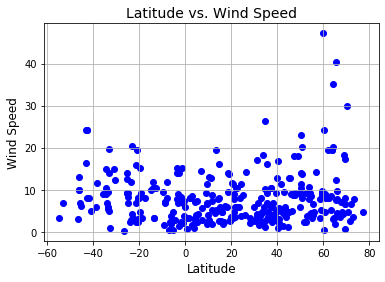

In [36]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.title("Latitude vs. Wind Speed", fontsize=14)
plt.grid(True)
plt.savefig("lat_vs_wind.png")
plt.show()
